In [ ]:
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install pandas

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "1g").\
        getOrCreate()

22/01/13 16:48:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [31]:
df = spark.read.option("header", "true").csv("data/*.gz")
df.printSchema()
df_bra = df


root
 |-- status_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- screen_name: string (nullable = true)
 |-- text: string (nullable = true)
 |-- source: string (nullable = true)
 |-- reply_to_status_id: string (nullable = true)
 |-- reply_to_user_id: string (nullable = true)
 |-- reply_to_screen_name: string (nullable = true)
 |-- is_quote: string (nullable = true)
 |-- is_retweet: string (nullable = true)
 |-- favourites_count: string (nullable = true)
 |-- retweet_count: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- place_full_name: string (nullable = true)
 |-- place_type: string (nullable = true)
 |-- followers_count: string (nullable = true)
 |-- friends_count: string (nullable = true)
 |-- account_lang: string (nullable = true)
 |-- account_created_at: string (nullable = true)
 |-- verified: string (nullable = true)
 |-- lang: string (nullable = true)



In [28]:
from pyspark.sql.functions import split, explode, col, desc
from wordcloud import WordCloud
from pyspark.sql.types import StringType
from pyspark.sql import functions 
import pandas

df = df.where(col("text").isNotNull())
df = df.withColumn("text",col("text").cast(StringType()))

words = df.select(explode(split("text", "\\s+")).alias("text")).where(col("text").startswith("#"))


'wordsPandas = words.toPandas()\n\njoinedWords = \' \'.join(wordsPandas[\'text\'])\nwordcloud = WordCloud(max_words=50).generate(joinedWords)\n\n\nimport matplotlib.pyplot as plt\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\n\n# lower max_font_size\nwordcloud = WordCloud(max_font_size=40,max_words=50).generate(joinedWords)\n#plt.figure()\nplt.imshow(wordcloud, interpolation="bilinear")\nplt.axis("off")\nplt.show()\n'

In [29]:
wordCountDF = words.groupBy("text").count()
#wordCountDF.orderBy(desc("count")).show()

df = wordCountDF.toPandas()

+--------------------+-------+
|                text|  count|
+--------------------+-------+
|            #COVID19|3510791|
|        #coronavirus|2514482|
|           #Covid_19|1028154|
|        #Coronavirus| 832266|
|            #covid19| 582985|
|            #Covid19| 478260|
|           #COVID19.| 286636|
|          #COVIDー19| 167854|
|#CoronavirusPandemic| 153288|
|       #coronavirus.| 131085|
|        #CoronaVirus| 130746|
|           #COVID19,| 123354|
|           #lockdown| 108802|
|           #StayHome|  98391|
|   #StayHomeStaySafe|  90637|
|#CoronavirusOutbreak|  86408|
|          #COVID2019|  82482|
|       #coronavirus,|  69978|
|         #StayAtHome|  68601|
|              #COVID|  68081|
+--------------------+-------+
only showing top 20 rows



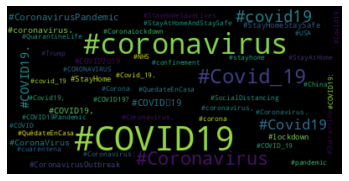

In [30]:
wordD = {}
for a, x in df.values:
    wordD[a] = x

wordcloud = WordCloud().generate_from_frequencies(frequencies=wordD)


import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40,max_words=50).generate_from_frequencies(frequencies=wordD)
#plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
df_bra = df_bra.where(col("country_code") == "BR")
df_bra = df_bra.where(col("text").isNotNull())
df_bra = df_bra.withColumn("text",col("text").cast(StringType()))

words = df_bra.select(explode(split("text", "\\s+")).alias("text")).where(col("text").startswith("#"))

wordCountDF = words.groupBy("text").count()
df = wordCountDF.toPandas()

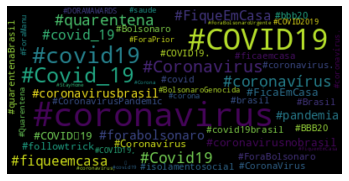

In [37]:
wordD = {}
for a, x in df.values:
    wordD[a] = x

wordcloud = WordCloud().generate_from_frequencies(frequencies=wordD)


import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40,max_words=50).generate_from_frequencies(frequencies=wordD)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()